<a href="https://colab.research.google.com/github/yasminmulla/CaseStudy/blob/Yulu/yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Project CaseStudy : Yulu***

**1.Problem Statement and Analyzing basic metrics**

**2.Missing Value and Outlier Detection**

**3. Feature Engineering**

**4. Business Insights based on Non- Graphical and Visual Analysis**

**5. Hypothesis Testing and Stastical Analysis:**
1. Statstical Analysis
2. Check whether, Working Day has effect on number of electric cycles rented?
2.Check whether, No. of cycles rented similar or different in different seasons
3.Check whether,	No. of cycles rented similar or different in different weather
4. Check whether,	Weather is dependent on season
5. levene’s test , Shapiro-wilk test, Q-Q Plot

**6. Business Insights**

**7. Recommendations**

## 1.Problem Statement and Analyzing basic metrics :

**Yulu have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.**

**How you can help here?**

The company wants to know:

**•	Which variables are significant in predicting the demand for shared electric cycles in the Indian market?**

**•	How well those variables describe the electric cycle demands  **


In [ ]:
##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import statistics as stat
import statsmodels.api as sm

from scipy.stats import percentileofscore
from scipy.stats import chi2_contingency
from scipy.stats import levene
from scipy.stats import shapiro

In [ ]:
yulu_df = pd.read_csv('yulu.csv')

In [ ]:
yulu_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
yulu_df.shape

(10886, 12)

Column Profiling:

•	datetime: datetime

•	season: season (1: spring, 2: summer, 3: fall, 4: winter)

•	holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

•	workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

•	weather:

o	   1: Clear, Few clouds, partly cloudy, partly cloudy

o	   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

o	3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

o	4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

•	temp: temperature in Celsius

•	atemp: feeling temperature in Celsius

•	humidity: humidity

•	windspeed: wind speed

•	casual: count of casual users

•	registered: count of registered users

•	count: count of total rental bikes including both casual and registered



In [ ]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:

# 1. Shape of Data
print("1. Shape of Data:", yulu_df.shape)
print("\n")

# 2. Data Types
print("2. Data Types of Attributes:")
print(yulu_df.dtypes)
print("\n")

# 3. Statistical Summary
print("\n 5.Statistical Summary :")
yulu_df.describe()


1. Shape of Data: (10886, 12)


2. Data Types of Attributes:
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object



 5.Statistical Summary :


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## **2.Missing Value and Outlier Detection :**

In [ ]:

#  Missing Value Detection
print("\n 4. Missing Value Detection ")
yulu_df.isnull().sum()
missing_values = yulu_df.isnull().sum()
print(missing_values)
if missing_values.empty:
  print("Missing Values:")
else:
  print("No Missing values dectected. ")

print("\n")


 4. Missing Value Detection 
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
No Missing values dectected. 




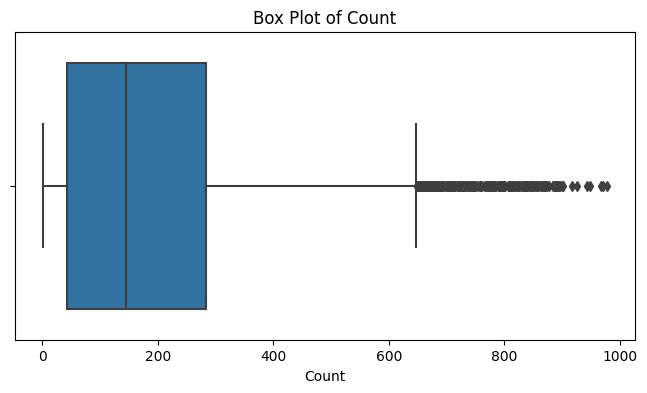

In [ ]:
# Create a box plot for the 'count' column
plt.figure(figsize=(8, 4))
sns.boxplot(x=yulu_df['count'])
plt.xlabel('Count')
plt.title('Box Plot of Count')
plt.show()

In [ ]:
yulu_df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16


In [ ]:
# Select numerical columns
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

# Check for null values
null_values = yulu_df[numerical_columns].isna().sum()

# Find outliers using the IQR method for each numerical column
outliers = {}
for column in numerical_columns:
    Q1 = yulu_df[column].quantile(0.25)
    Q3 = yulu_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column_outliers = ((yulu_df[column] < lower_bound) | (yulu_df[column] > upper_bound)).sum()
    outliers[column] = column_outliers

print("\nNull Values:")
print(null_values)

print("\nOutliers:")
print(outliers)




Null Values:
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

Outliers:
{'temp': 0, 'atemp': 0, 'humidity': 22, 'windspeed': 227, 'casual': 749, 'registered': 423}


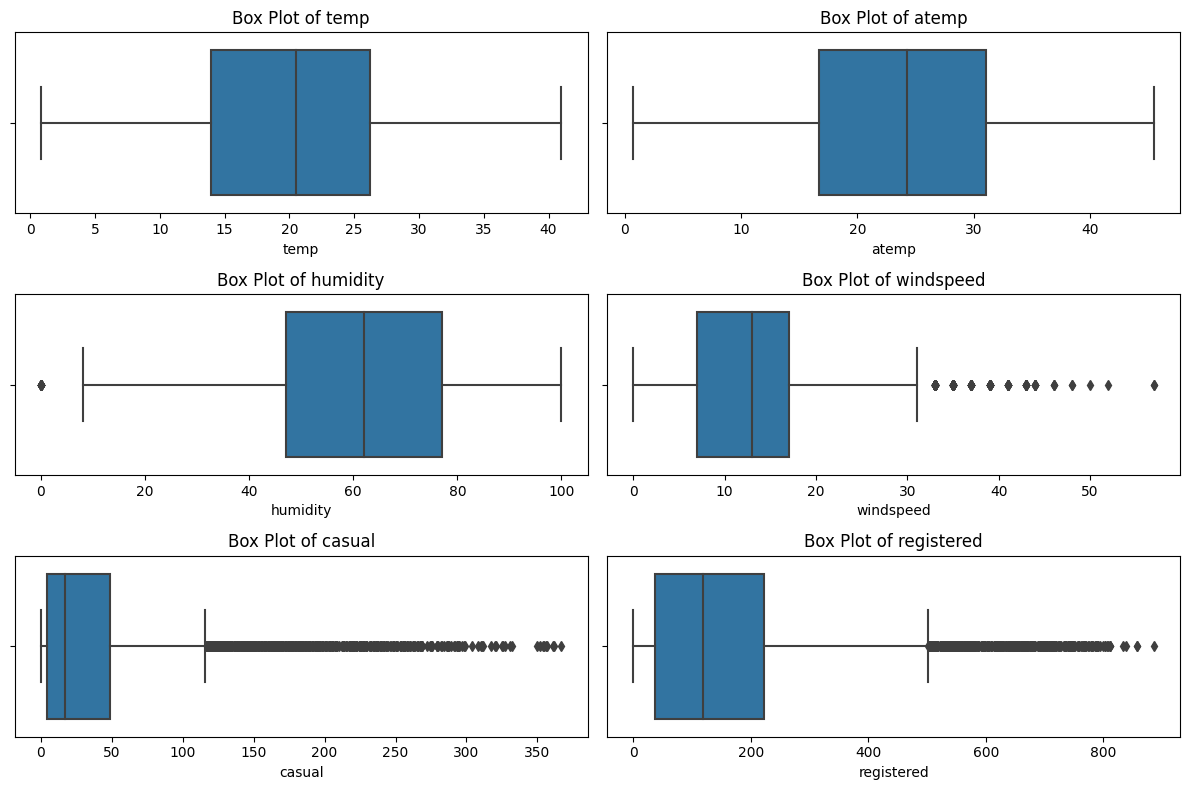

In [ ]:

num_columns = 3
num_rows = 3

# Set the figure size based on the number of columns
plt.figure(figsize=(12, 8))

# Loop through each numeric column and create a box plot
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 2, i)  # Create a subplot based on the calculated rows and columns
    sns.boxplot(x=yulu_df[column])
    plt.xlabel(column)
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


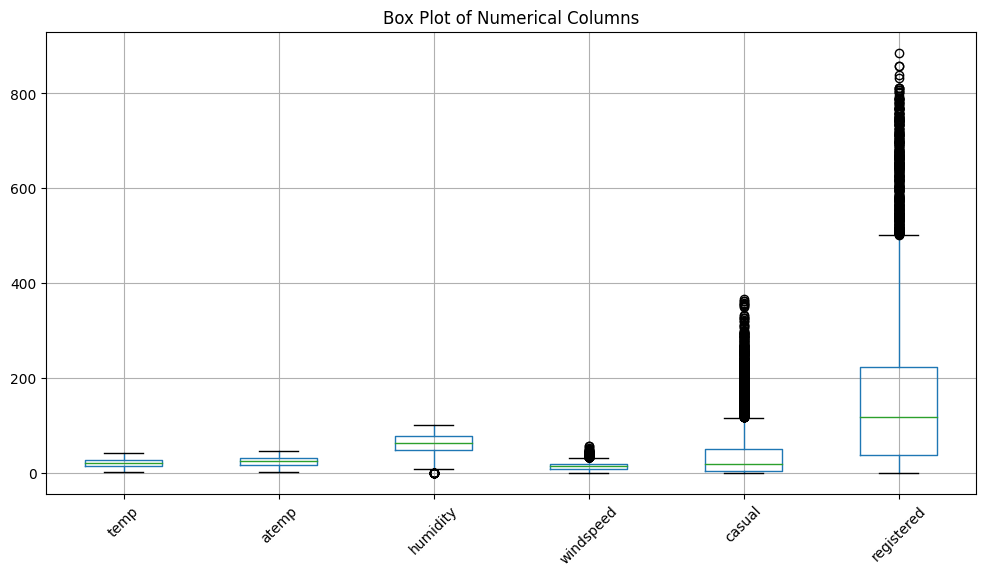

In [ ]:
# Select numerical columns
# Create box plots for numerical columns
plt.figure(figsize=(12, 6))
numerical_columns_df = yulu_df[numerical_columns]
numerical_columns_df.boxplot()
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=45)
plt.show()


**Inference :**

Outliers:
1.  The columns temp and atemp do not have any outliers, as the count of outliers is 0 for both columns.
2.  The column humidity has 22 outliers, indicating that there are data points with humidity values that significantly deviate from the median of the distribution.
3.  The column windspeed has 227 outliers, suggesting that there are data points with windspeed values that are significantly different from the median.
4.  The column casual has 749 outliers, indicating that there are extreme values in the number of casual rentals.
5.  The column registered has 423 outliers, suggesting that there are extreme values in the number of registered rentals.

# **3. Feature Engineering**

In [ ]:
# Need to convert datetime to datetime data type
yulu_df['datetime'] = pd.to_datetime(yulu_df['datetime'])

In [ ]:
#  Conversion of Categorical Attributes
print("3. Conversion of Categorical Attributes:")
yulu_df['season'] = yulu_df['season'].astype('category')
yulu_df['weather'] = yulu_df['weather'].astype('category')
yulu_df['holiday'] = yulu_df['holiday'].astype('category')
yulu_df['workingday'] = yulu_df['workingday'].astype('category')
print(yulu_df.dtypes)
print("\n")

3. Conversion of Categorical Attributes:
datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object




In [ ]:
# Define a mapping of weather codes to labels
weather_labels = {
    1: 'Clear, Few clouds...',
    2: 'Mist + Cloudy...',
    3: 'Light Snow, Light Rain...',
    4: 'Heavy Rain + Ice Pallets...'
}

# Create a new column 'weather_label' based on the mapping
yulu_df['weather_label'] = yulu_df['weather'].map(weather_labels)


In [ ]:
# Assuming your DataFrame is called yulu_df
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
yulu_df['season_label'] = yulu_df['season'].map(season_labels)

In [ ]:
yulu_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weather_label,season_label
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,"Clear, Few clouds...",Spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,"Clear, Few clouds...",Spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,"Clear, Few clouds...",Spring


In [ ]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       10886 non-null  datetime64[ns]
 1   season         10886 non-null  category      
 2   holiday        10886 non-null  category      
 3   workingday     10886 non-null  category      
 4   weather        10886 non-null  category      
 5   temp           10886 non-null  float64       
 6   atemp          10886 non-null  float64       
 7   humidity       10886 non-null  int64         
 8   windspeed      10886 non-null  float64       
 9   casual         10886 non-null  int64         
 10  registered     10886 non-null  int64         
 11  count          10886 non-null  int64         
 12  weather_label  10886 non-null  category      
 13  season_label   10886 non-null  category      
dtypes: category(6), datetime64[ns](1), float64(3), int64(4)
memory usage: 

In [ ]:
yulu_df['season_label'] = yulu_df['season_label'].astype('category')
yulu_df['weather_label'] = yulu_df['weather_label'].astype('category')

In [ ]:
yulu_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weather_label,season_label
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,"Clear, Few clouds...",Spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,"Clear, Few clouds...",Spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,"Clear, Few clouds...",Spring


# **4. Business Insights based on Non- Graphical and Visual Analysis:**

In [ ]:
yulu_df.groupby('workingday')['count'].sum().reset_index()

,workingday,count
0,0,654872
1,1,1430604


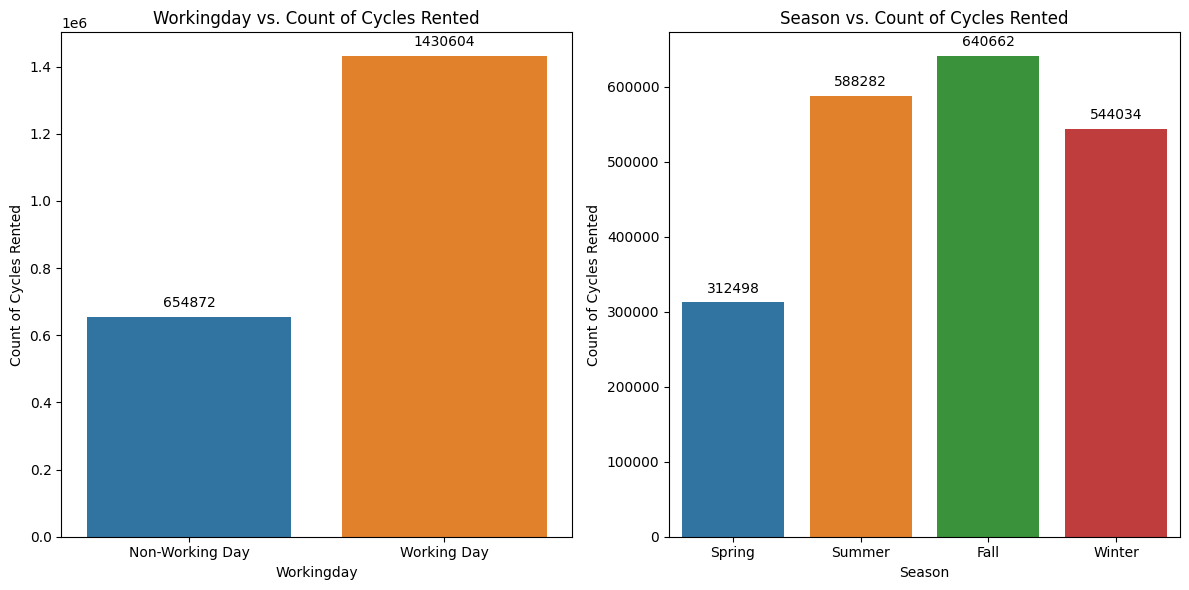

In [ ]:
plt.figure(figsize=(12, 6))

workingday_counts = yulu_df.groupby('workingday')['count'].sum().reset_index()
# Plot 'workingday' vs. 'count' (Bar Plot)

plt.subplot(1, 2, 1)

ax = sns.barplot(x='workingday', y='count', data=workingday_counts)
plt.xlabel('Workingday')
plt.ylabel('Count of Cycles Rented')
plt.title('Workingday vs. Count of Cycles Rented')
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'])
 # Add count labels above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')


# Group by 'season' and sum 'count' for each season
season_counts = yulu_df.groupby('season')['count'].sum().reset_index()

# Create the bar plot
plt.subplot(1, 2, 2)
ax = sns.barplot(x='season', y='count', data=season_counts)
plt.xlabel('Season')
plt.ylabel('Count of Cycles Rented')
plt.title('Season vs. Count of Cycles Rented')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])

# Add count labels above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')


plt.tight_layout()
plt.show()


**Inference:**   
1. The significantly more cycles were rented on working days (1,430,604) compared to non-working days (654,872). This suggests that there is a substantial difference in the number of cycles rented between working days and non-working days. Working days seem to be the period when a higher demand for cycle rentals occurs.

2. Fall appears to be the season with the highest number of cycle rentals (640,662), suggesting that it might be the most popular season for cycling.

    Summer also has a substantial number of cycle rentals (588,282), indicating that it's a popular season for cycling as well.

    Spring and Winter have fewer cycle rentals compared to Fall and Summer, with Spring having the lowest count among the four seasons.

Overall, the inference is that the demand for cycle rentals varies across seasons, with Fall and Summer being the peak seasons for cycling, while Spring and Winter have lower demand.

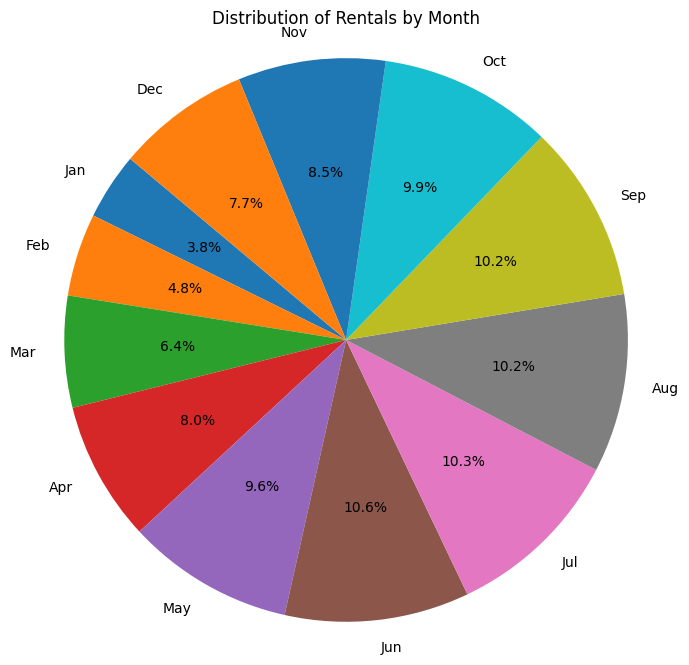

In [ ]:

# Extract the month from the 'datetime' column
yulu_df['month'] = yulu_df['datetime'].dt.month

# Calculate the counts of each unique month
month_counts = yulu_df.groupby('month')['count'].sum().sort_index()

# Define month names for labeling
month_names = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(month_counts, labels=month_names, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Rentals by Month')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


**Inference:**
The demand for cycle rentals tends to increase from January to September, with the highest demand occurring in September.

1.  From October to December, there is a gradual decrease in the demand for cycle rentals, with the lowest demand occurring in January.


2.  The months of June, July, and August (summer months) have the highest percentages of cycle rentals, indicating that these are the peak months for cycling.


3.  The months of December, January, and February (winter months) have the lowest percentages of cycle rentals, suggesting that cycling is less popular during the winter season.


Overall, the demand for cycle rentals follows a seasonal pattern, with higher demand during the warmer months and lower demand during the colder months.

In [ ]:
yulu_df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weather_label,season_label,month
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,"Clear, Few clouds...",Spring,1


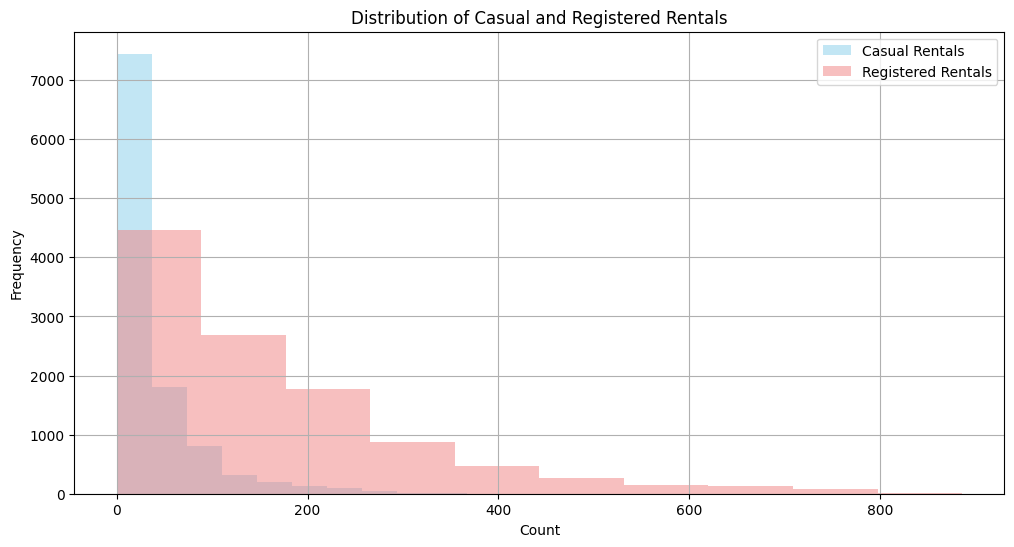

In [ ]:

# Create a histogram with bins for 'casual' rentals
plt.figure(figsize=(12, 6))
plt.hist(yulu_df['casual'], bins=10, alpha=0.5, label='Casual Rentals', color='skyblue')

# Create a histogram with bins for 'registered' rentals
plt.hist(yulu_df['registered'], bins=10, alpha=0.5, label='Registered Rentals', color='lightcoral')

plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Casual and Registered Rentals')
plt.legend()
plt.grid(True)
plt.show()



**Inference:**

'Registered' rentals significantly outnumber 'casual' rentals. This suggests that the majority of the bike rentals in the dataset are registered users, who are likely regular customers or subscribers of the bike rental service.
'Casual' rentals represent a smaller portion of the total rentals. These are likely occasional or one-time users of the service, such as tourists or individuals who rent bikes on a non-regular basis.

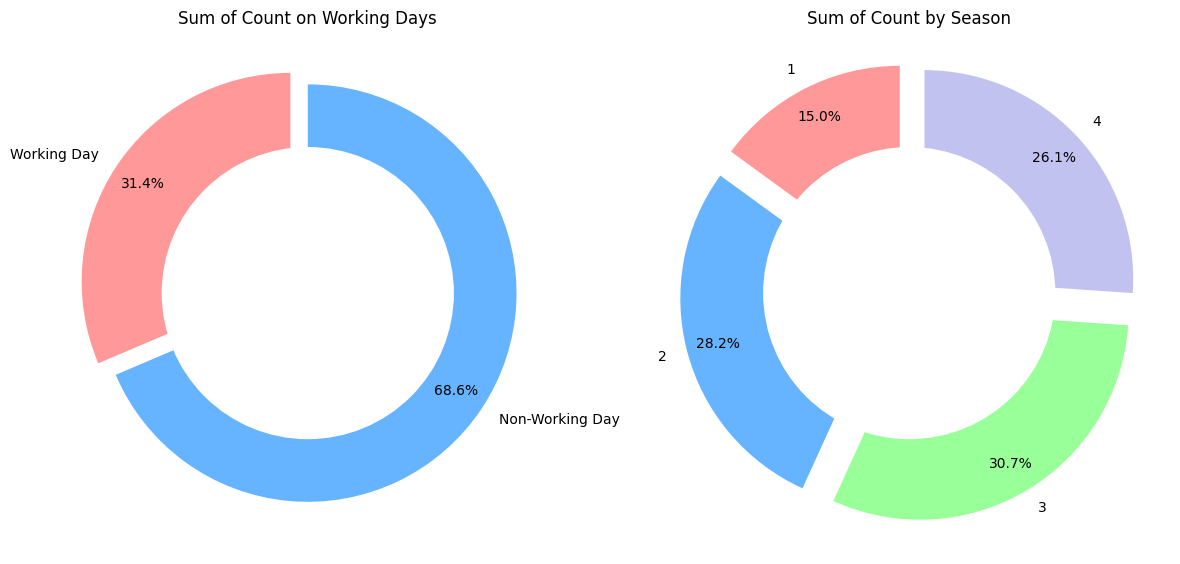

In [ ]:


# Calculate the sum of 'count' for working days and non-working days
workingday_sum = yulu_df.groupby('workingday')['count'].sum()

# Calculate the sum of 'count' for each season
season_sum = yulu_df.groupby('season')['count'].sum()

# Create a figure with subplots for the pie charts
plt.figure(figsize=(12, 6))

# Pie Chart for 'workingday'
labels = ['Working Day', 'Non-Working Day']
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Explode the first slice (i.e., 'Working Day')

plt.subplot(1, 2, 1)
plt.pie(workingday_sum, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.title('Sum of Count on Working Days')

# Pie Chart for 'season'

colors = ['#ff9999', '#66b3ff', '#99ff99', '#c2c2f0']
explode = (0.1, 0.1, 0.1, 0.1)  # Explode all slices

plt.subplot(1, 2, 2)
plt.pie(season_sum, labels=season_labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.title('Sum of Count by Season')

plt.tight_layout()
plt.show()


**Inference:**
1.  A significantly larger percentage of cycle rentals (68.6%) occurs on non-working days, which include weekends and holidays.

2.  On working days (weekdays), there is a lower percentage of cycle rentals (31.4%), suggesting that cycling is less popular during weekdays when people are more likely to be engaged in work or other activities.

3.  The higher percentage of cycle rentals on non-working days implies that weekends and holidays are the peak periods for cycling, while cycling activity decreases on regular working weekdays.

Overall, the percentage of rented cycles varies significantly between non-working days and working days, with a higher percentage of rentals occurring on non-working days. This indicates a clear difference in cycling patterns based on the day of the week.

# **5. Hypothesis Testing And Statstical Analysis :**

1. Statstical Analysis
2. Check whether, Working Day has effect on number of electric cycles rented?
3.  Check whether, No. of cycles rented similar or different in different seasons
4.  Check whether,	No. of cycles rented similar or different in different weather
5. Check whether,	Weather is dependent on season
6. levene’s test , Shapiro-wilk test, Q-Q Plot

**1. Statstical Analysis**

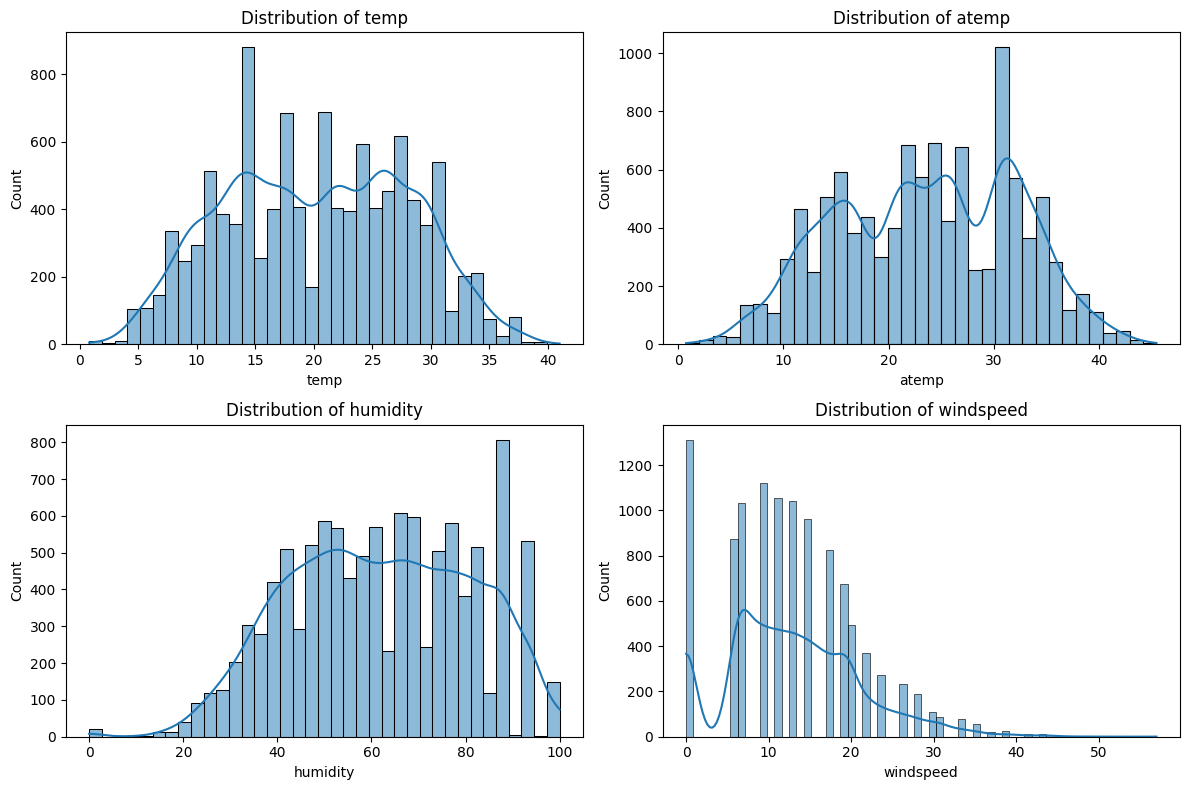

In [ ]:

continuous_variables = ['temp', 'atemp', 'humidity', 'windspeed']

# Create distribution plots for continuous variables
plt.figure(figsize=(12, 8))
for i, var in enumerate(continuous_variables, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=yulu_df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

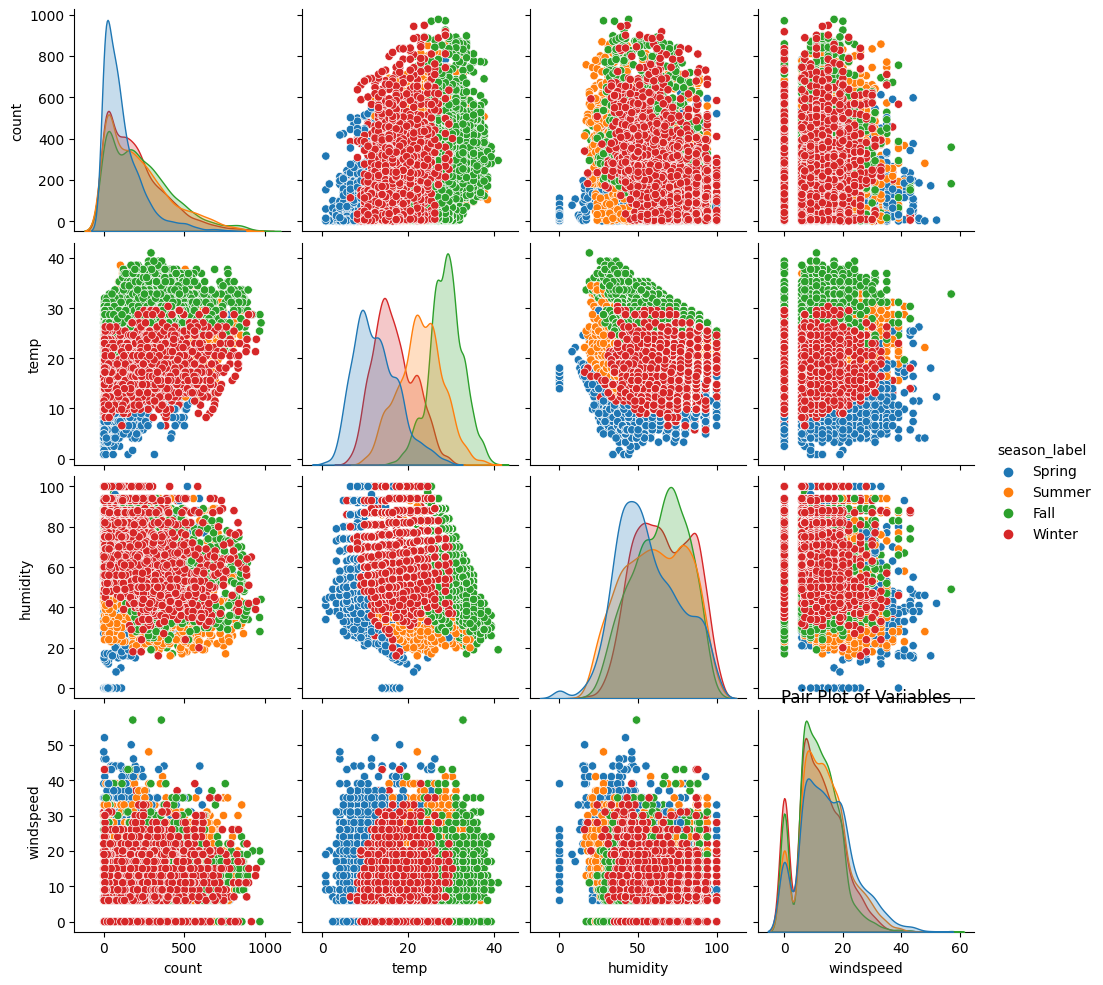

In [ ]:
# Create a pair plot
sns.pairplot(yulu_df, vars=['count', 'temp', 'humidity', 'windspeed'], hue='season_label', diag_kind='kde')

# Customize plot labels, titles, and legends as needed
plt.title('Pair Plot of Variables')
plt.show()

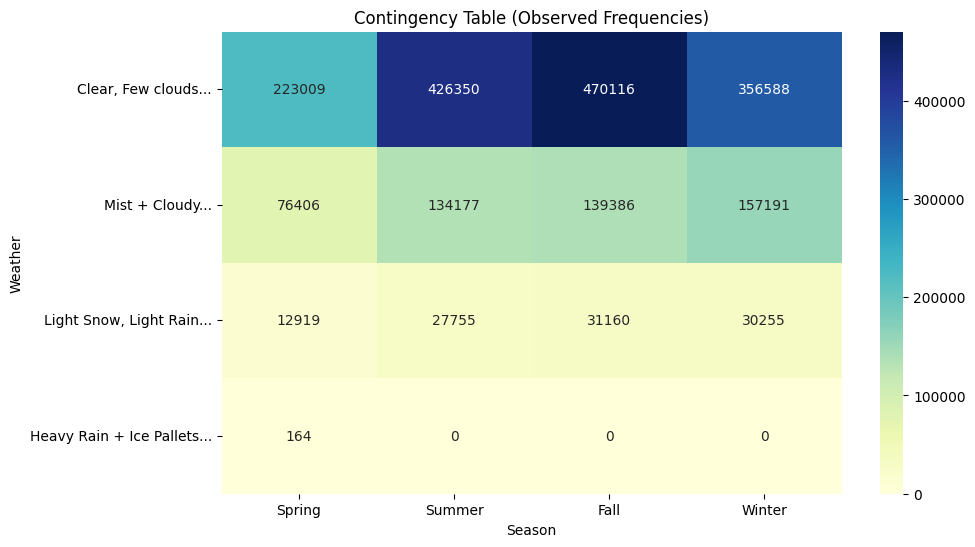

In [ ]:

# Create a contingency table of 'weather_label' and 'season_label' with 'count' as values
contingency_table = pd.crosstab(yulu_df['weather_label'], yulu_df['season_label'], values=yulu_df['count'], aggfunc='sum')

# Visualize the observed frequencies using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='g')
plt.xlabel('Season')
plt.ylabel('Weather')
plt.title('Contingency Table (Observed Frequencies)')
plt.show()



**2. To test whether the "Working Day" variable has an effect on the number of electric cycles rented**

**Null Hypothesis (H0):**
 There is no significant difference in the number of electric cycles rented on working days and non-working days.

**Alternative Hypothesis (H1):**
 There is a significant difference in the number of electric cycles rented between working days and non-working days.

In [ ]:
# Considering Sample Size is first 1000 records
# Split the data into two groups based on 'workingday'
working_day = yulu_df[yulu_df['workingday'] == 1]['count']
non_working_day = yulu_df[yulu_df['workingday'] == 0]['count']

# Perform a 2-sample t-test

t_stat, p_value = stats.ttest_ind(working_day[:100], non_working_day[:100])

# Print the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in bike rentals between working and non-working days.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in bike rentals between working and non-working days.")


T-Statistic: 4.568444445174054
P-Value: 8.630918936483089e-06
Reject the null hypothesis: There is a significant difference in bike rentals between working and non-working days.


In [ ]:
# Considering Sample Size is first 1000 records
# Split the data into two groups based on 'workingday'
working_day = yulu_df[yulu_df['workingday'] == 1]['count'].sample(n=1000, random_state=42)
non_working_day = yulu_df[yulu_df['workingday'] == 0]['count'].sample(n=1000, random_state=42)

# Perform a 2-sample t-test

t_stat, p_value = stats.ttest_ind(working_day, non_working_day)

# Print the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in bike rentals between working and non-working days.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in bike rentals between working and non-working days.")


T-Statistic: 2.029179351267317
P-Value: 0.04257235908625167
Reject the null hypothesis: There is a significant difference in bike rentals between working and non-working days.


**3. We perform ANOVA to examine whether the number of rented cycles remains consistent or fluctuates across various seasons**

HO : There is a significant difference in the number of bike rentals across seasons.

HA : There is no significant difference in the number of bike rentals across seasons.

In [ ]:
 # Consider sample size is 1200

# Group the 'count' data by 'season'
spring_rentals = yulu_df[yulu_df['season'] == 1]['count'].sample(n=1000, random_state=42)
summer_rentals = yulu_df[yulu_df['season'] == 2]['count'].sample(n=1000, random_state=42)
fall_rentals = yulu_df[yulu_df['season'] == 3]['count'].sample(n=1000, random_state=42)
winter_rentals = yulu_df[yulu_df['season'] == 4]['count'].sample(n=1000, random_state=42)

# Perform a one-way ANOVA test
f_statistic, p_value = stats.f_oneway(spring_rentals, summer_rentals, fall_rentals, winter_rentals)

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the number of bike rentals across seasons.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the number of bike rentals across seasons.")


F-Statistic: 91.28525139107569
P-Value: 3.8912766342447856e-57
Reject the null hypothesis: There is a significant difference in the number of bike rentals across seasons.


In [ ]:
wData = yulu_df[yulu_df['weather'] == 3]['count']

In [ ]:
type(wData)

pandas.core.series.Series

**4. We perform ANOVA test to determine whether there is a correlation between weather conditions and the number of rented cycles, assessing whether they are alike or vary.**

HO: There is a significant difference in bike rentals across weather conditions.

HA: There is no significant difference in bike rentals across weather conditions.

In [ ]:

# Group the 'count' data by 'weather'
weather_1_rentals = yulu_df[yulu_df['weather'] == 1]['count'].sample(n=800, replace=True, random_state=42)
weather_2_rentals = yulu_df[yulu_df['weather'] == 2]['count'].sample(n=800, replace=True,random_state=42)
weather_3_rentals = yulu_df[yulu_df['weather'] == 3]['count'].sample(n=800, replace=True,random_state=42)
weather_4_rentals = yulu_df[yulu_df['weather'] == 4]['count'].sample(n=800, replace=True, random_state=42)

# Perform a one-way ANOVA test
f_statistic, p_value = stats.f_oneway(weather_1_rentals, weather_2_rentals, weather_3_rentals, weather_4_rentals)

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in bike rentals across weather conditions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in bike rentals across weather conditions.")



F-Statistic: 46.310965804709994
P-Value: 2.727276835260097e-29
Reject the null hypothesis: There is a significant difference in bike rentals across weather conditions.


**5. Check whether,	Weather is dependent on season :  We perform the chi-square test using chi2_contingency to determine whether there is a significant relationship between 'weather' and 'season.'**

In [ ]:

# Null Hypothesis (H0): There is no significant relationship between weather and season.

# Alternative Hypothesis (H1): There is a significant relationship between weather and season.

# Create a contingency table of 'weather' and 'season' with 'count' as values
contingency_table = pd.pivot_table(yulu_df, values='count', index='weather_label', columns='season_label', aggfunc='count', fill_value=0)

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-Value:", p)

# Set the significance level (alpha)
alpha = 0.05

# Interpret the results
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between weather and season.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between weather and season.")


Chi-Square Statistic: 49.15865559689363
P-Value: 1.5499250736864862e-07
Reject the null hypothesis: There is a significant relationship between weather and season.


Interpretation: Since the p-value (1.55e-07) is much smaller than the chosen significance level (alpha = 0.05), we have strong evidence to reject the null hypothesis. This means that there is a statistically significant relationship between 'weather' and 'season.'

In more practical terms, this result suggests that the weather conditions and the seasons are not independent of each other; they are related. It indicates that the distribution of bike rentals ('count') varies significantly with both the weather conditions and the seasons.

In [ ]:
yulu_df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weather_label,season_label,month
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,"Clear, Few clouds...",Spring,1


**6. levene’s test , Shapiro-wilk test, Q-Q Plot**

In [ ]:
from scipy.stats import shapiro

# Assuming 'yulu_df' contains the dataset
count_data = yulu_df['count']
p_value_shapiro = shapiro(count_data)[1]

if p_value_shapiro < 0.05:
    print("Shapiro-Wilk Test: The 'count' variable is not normally distributed.")
else:
    print("Shapiro-Wilk Test: The 'count' variable is normally distributed.")


Shapiro-Wilk Test: The 'count' variable is not normally distributed.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


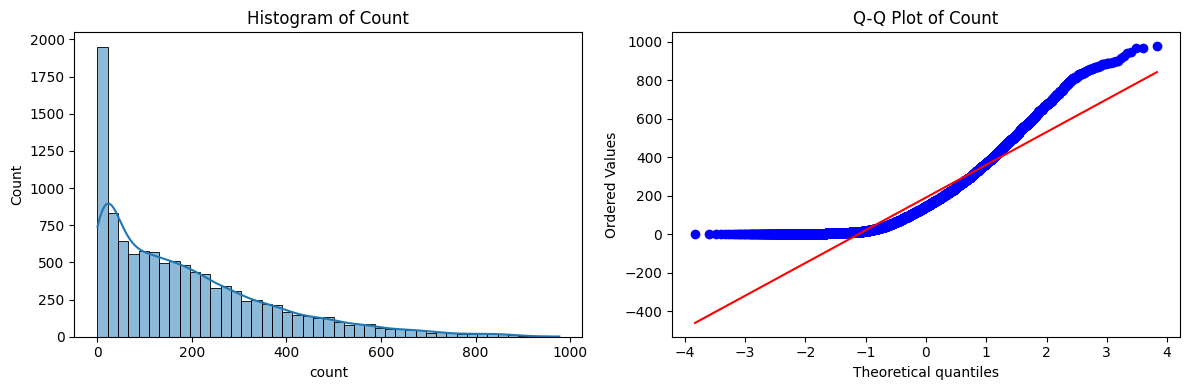

In [ ]:


# Histogram
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(yulu_df['count'], kde=True)
plt.title('Histogram of Count')

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(yulu_df['count'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Count')

plt.tight_layout()
plt.show()



In [ ]:

seasons = yulu_df['season']
counts = yulu_df['count']

# Create groups of 'count' based on 'season'
groups = [counts[seasons == season] for season in seasons.unique()]

# Perform Levene's Test
p_value_levene = levene(*groups)[1]

# Set significance level (alpha)
alpha = 0.05

# Interpret the result
if p_value_levene < alpha:
    print("Levene's Test: The variances of 'count' are not equal across seasons.")
else:
    print("Levene's Test: The variances of 'count' are equal across seasons.")



Levene's Test: The variances of 'count' are not equal across seasons.


In [ ]:

weathers = yulu_df['weather']
counts = yulu_df['count']

# Create groups of 'count' based on 'season'
groups = [counts[weathers == weather] for weather in weathers.unique()]

# Perform Levene's Test
p_value_levene = levene(*groups)[1]

# Set significance level (alpha)
alpha = 0.05

# Interpret the result
if p_value_levene < alpha:
    print("Levene's Test: The variances of 'count' are not equal across weather.")
else:
    print("Levene's Test: The variances of 'count' are equal across weather.")


Levene's Test: The variances of 'count' are not equal across weather.


## **Business Insights:**

**1. Seasonal Trends:** There is a clear seasonal pattern in the rental of electric cycles, with the highest rentals occurring during the summer and fall months. This indicates that people prefer using electric cycles for commuting and leisure activities during the warmer seasons.

**2. Weather Impact:** Weather conditions significantly affect the rental behavior. Rentals are lower during adverse weather conditions (e.g., heavy rain, snow, or fog), while clear and mild weather attracts more riders. It's crucial to consider weather forecasts for demand forecasting and resource allocation.

**3. Working Days vs. Non-Working Days:** Rentals are higher on non-working days compared to working days, suggesting that a significant portion of users relies on electric cycles for non working days and holidays. Understanding the commuting patterns of users can help in optimizing fleet distribution.

**4. Outlier Analysis: **There are outliers in various columns, especially in the 'casual' and 'registered' counts. These outliers may represent special events or anomalies.


## **Recommendations:**

**Promotions and Incentives:** To encourage ridership during off-peak seasons (e.g., winter), consider offering promotions or discounts to attract users. Special offers during adverse weather conditions can also help mitigate the impact of weather on rentals.

**Demand Forecasting:** Utilize historical data on weather, seasonality, and working days to develop robust demand forecasting models. This will aid in optimizing inventory management, ensuring that the right number of cycles are available when and where they are needed most.

**Maintenance and Safety:** During adverse weather conditions, prioritize maintenance and safety measures. Ensure that the cycles are well-maintained and equipped to handle various weather conditions. Educate users on safe riding practices, especially in challenging weather.

**Expand Marketing:** Focus marketing efforts on promoting electric cycle rentals as a convenient and eco-friendly commuting option, particularly on working days. Collaborate with businesses and educational institutions to offer discounts to employees and students.

**User Engagement:** Engage with users to gather feedback on their experiences and preferences. Conduct surveys or use app features to collect data on why users choose electric cycles, and use this information to improve services.